In [258]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='%(message)s', stream=sys.stdout)

In [259]:
d = ml.PQ(4*u.mm, sigma=0.01*u.mm)
r = d/2
l = ml.PQ(40*u.cm, sigma=0.5*u.mm)
Re = ml.PQ(1000, is_const=True)
a_approx = 0.2*r*Re # Примерное расстояние, с которого начнётся ламинарное течение
g = ml.PQ(9.815*u.m/u.s**2, is_const=True)
ro = ml.PQ(1.2047*u.kg/u.m**3, is_const=True)
mm_water_pressure = 1000*u.kg/u.m**3*1*u.mm*g
k = 0.2 # Коэффициент наклона трубки ММН

In [260]:
ticks = np.array([ml.PQ(val, sigma=0.5) for val in 
                     [4, 10.5, 15, 20, 26, 31]]) # Деления
dP = ml.repr_ndarray_as(ticks*mm_water_pressure*k, u.pascal)
print('P:', dP)
dV = np.array([ml.PQ(val*u.liters, sigma=0.01*u.liters, dim=u.liters) for val in 
                     [0.5, 1, 1, 1, 1, 1]])
print('dV', dV)
dT = np.array([ml.PQ(val*u.seconds, sigma=0.5*u.seconds) for val in 
                     [80, 60, 40, 30, 25, 20]])
print('dT', dT)
Q = dV/dT
print('Q', Q)

P: [7.852000±0.981500 pascal (0.125000) 20.611500±0.981500 pascal (0.047619)
 29.445000±0.981500 pascal (0.033333) 39.260000±0.981500 pascal (0.025000)
 51.038000±0.981500 pascal (0.019231) 60.853000±0.981500 pascal (0.016129)]
dV [0.500000±0.010000 liter (0.020000) 1.000000±0.010000 liter (0.010000)
 1.000000±0.010000 liter (0.010000) 1.000000±0.010000 liter (0.010000)
 1.000000±0.010000 liter (0.010000) 1.000000±0.010000 liter (0.010000)]
dT [80.000000±0.500000 second (0.006250) 60.000000±0.500000 second (0.008333)
 40.000000±0.500000 second (0.012500) 30.000000±0.500000 second (0.016667)
 25.000000±0.500000 second (0.020000) 20.000000±0.500000 second (0.025000)]
Q [0.006250±0.000131 liter/second (0.020954)
 0.016667±0.000217 liter/second (0.013017)
 0.025000±0.000400 liter/second (0.016008)
 0.033333±0.000648 liter/second (0.019437)
 0.040000±0.000894 liter/second (0.022361)
 0.050000±0.001346 liter/second (0.026926)]


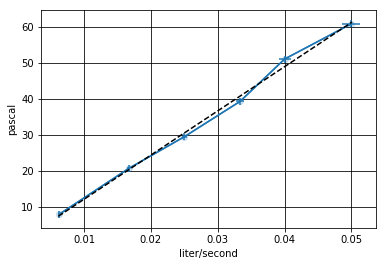

In [261]:
ml.plt_pq(Q, dP, ols=True)
# Тут смотрим, когда кончается прямая, и отрезаем ненужное

In [262]:
ols_coefs, ols_errors = ml.OLS(Q, dP)
print('k', ols_coefs[0])

k 1228.79086106


In [263]:
eta = ml.eval(u.pascal*u.s, lambda r, l, coef:np.pi*r**4/(8*l)*coef*(u.pascal*u.s)/u.liters, r, l, ols_coefs[0])
eta.val

1.93018017095763e-5*pascal*second

In [264]:
eta.repr_as(u.pascal*u.s)

0.000019±0.000000 pascal*second (0.010078)

In [265]:
# Для переходной области 
i_border = 5
Re = Q[i_border]*ro/(np.pi*r*eta)
print(Re)

496.673738±14.333255 kilogram*liter/(meter**3*millimeter*pascal*second**2) (0.028858)


In [266]:
# 6. Для гарантированно ламинарного течения измеряем распределение давления вдоль трубки.

In [267]:
Q_exper = ml.PQ(50*u.l/u.s, sigma=0.01)
ticks = np.array([ml.PQ(val, sigma=0.5) for val in 
                     [21, 57, 85, 123]]) # Деления
dP = ml.repr_ndarray_as(ticks*mm_water_pressure*k, u.pascal)
print('P:', dP)

l = np.array([ml.PQ(val, sigma=0.5) for val in 
                     [11.5, 41.5, 81.5, 131.5]])

P: [41.223000±0.981500 pascal (0.023810) 111.891000±0.981500 pascal (0.008772)
 166.855000±0.981500 pascal (0.005882)
 241.449000±0.981500 pascal (0.004065)]


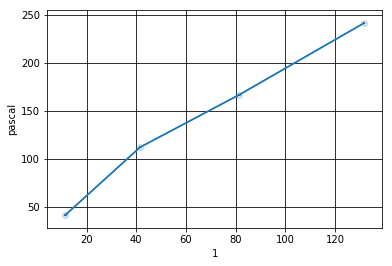

In [268]:
ml.plt_pq(l, dP)

In [269]:
# 5. Повторяем измерения на всех трубках для гарантированно ламинарного течения (Re<500)

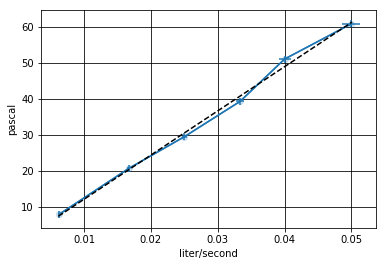

k 1228.79086106
0.000046±0.000000 pascal*second (0.007684)


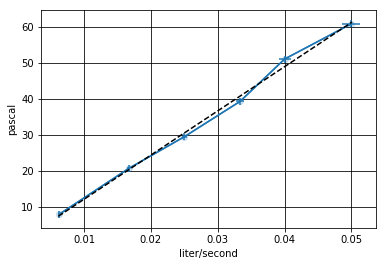

k 1228.79086106
0.000012±0.000000 pascal*second (0.013566)


In [270]:
d_s = np.array([ml.PQ(val*u.mm, sigma=0.01*u.mm) for val in 
                     [5.25, 3.00]])
l_s = np.array([ml.PQ(val*u.cm, sigma=0.5*u.mm) for val in 
                     [50, 20]])

ticks_s = [np.array([ml.PQ(val, sigma=0.5) for val in 
                     [4, 10.5, 15, 20, 26, 31]]),
           np.array([ml.PQ(val, sigma=0.5) for val in 
                     [4, 10.5, 15, 20, 26, 31]])]

dV_s = [np.array([ml.PQ(val*u.liters, sigma=0.01*u.liters, dim=u.liters) for val in 
                     [0.5, 1, 1, 1, 1, 1]]),
      np.array([ml.PQ(val*u.liters, sigma=0.01*u.liters, dim=u.liters) for val in 
                     [0.5, 1, 1, 1, 1, 1]])]

dT_s = [np.array([ml.PQ(val*u.seconds, sigma=0.5*u.seconds) for val in 
                     [80, 60, 40, 30, 25, 20]]),
      np.array([ml.PQ(val*u.seconds, sigma=0.5*u.seconds) for val in 
                     [80, 60, 40, 30, 25, 20]])]

calculated_radius = []

for d, l, ticks, dV, dT in zip(d_s, l_s, ticks_s, dV_s, dT_s):
    r = d/2
    dP = ml.repr_ndarray_as(ticks*mm_water_pressure*k, u.pascal)
    Q = dV/dT
    
    plt.figure()
    ml.plt_pq(Q, dP, ols=True)
    plt.show()
    ols_coefs, ols_errors = ml.OLS(Q, dP)
    print('k', ols_coefs[0])
    eta = ml.eval(u.pascal*u.s, lambda r, l, coef:np.pi*r**4/(8*l)*coef*(u.pascal*u.s)/u.liters, r, l, ols_coefs[0])
    print(eta)
    
    calculated_radius.append(8*l*eta/(np.pi*ols_coefs[0]))

[0.000005±0.000000 centimeter*pascal*second (0.007749), 0.000001±0.000000 centimeter*pascal*second (0.013794)]


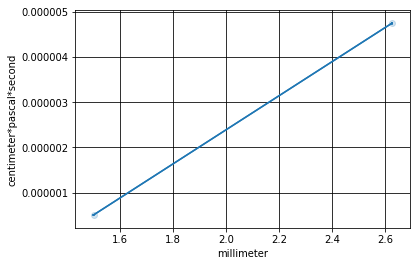

In [272]:
#TODO: добавить точку первой трубы. И починить размерности.
r_s = d_s/2
print(calculated_radius)
ml.plt_pq(r_s, np.array(calculated_radius))